<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;text-align:center;">
    <h1>Zomato Data Analysis</h1>
</div>

<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">
    <strong>we will use the following libraries in our project:</strong>
    <li><i>Numpy</i></li>
    <li><i>Pandas</i></li>
    <li><i>matplotlib</i></li>
    <li><i>seaborn</i></li>
    <li><i>missingno</i></li>
</div>

<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">
    <strong>The reason of this analysis is to answer this questions?</strong>
    <li><i>Do a greater number of restaurants provide online delivery as opposed to offline services?</i></li>
    <li><i>Which types of restaurants are the most favored by the general public?</i></li>
    <li><i>What price range is preferred by couples for their dinner at restaurants?</i></li>
</div>

In [16]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [8]:
# load the dataset
df = pd.read_csv(r'./Data/Zomato.csv')

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">before analyze our data we will rete fix the rate column, we will remote the <STRONG>/5</STRONG> part so let's do it</div>

In [9]:
def fix_rate_col(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

# then we will use apply method to apply this transformation on our column

df['rate'] = df['rate'].apply(fix_rate_col)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [10]:
# let's explore our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">we can see that our data contain 4 col with object datatype, 1 float and 2 int</div>

In [11]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


<Axes: >

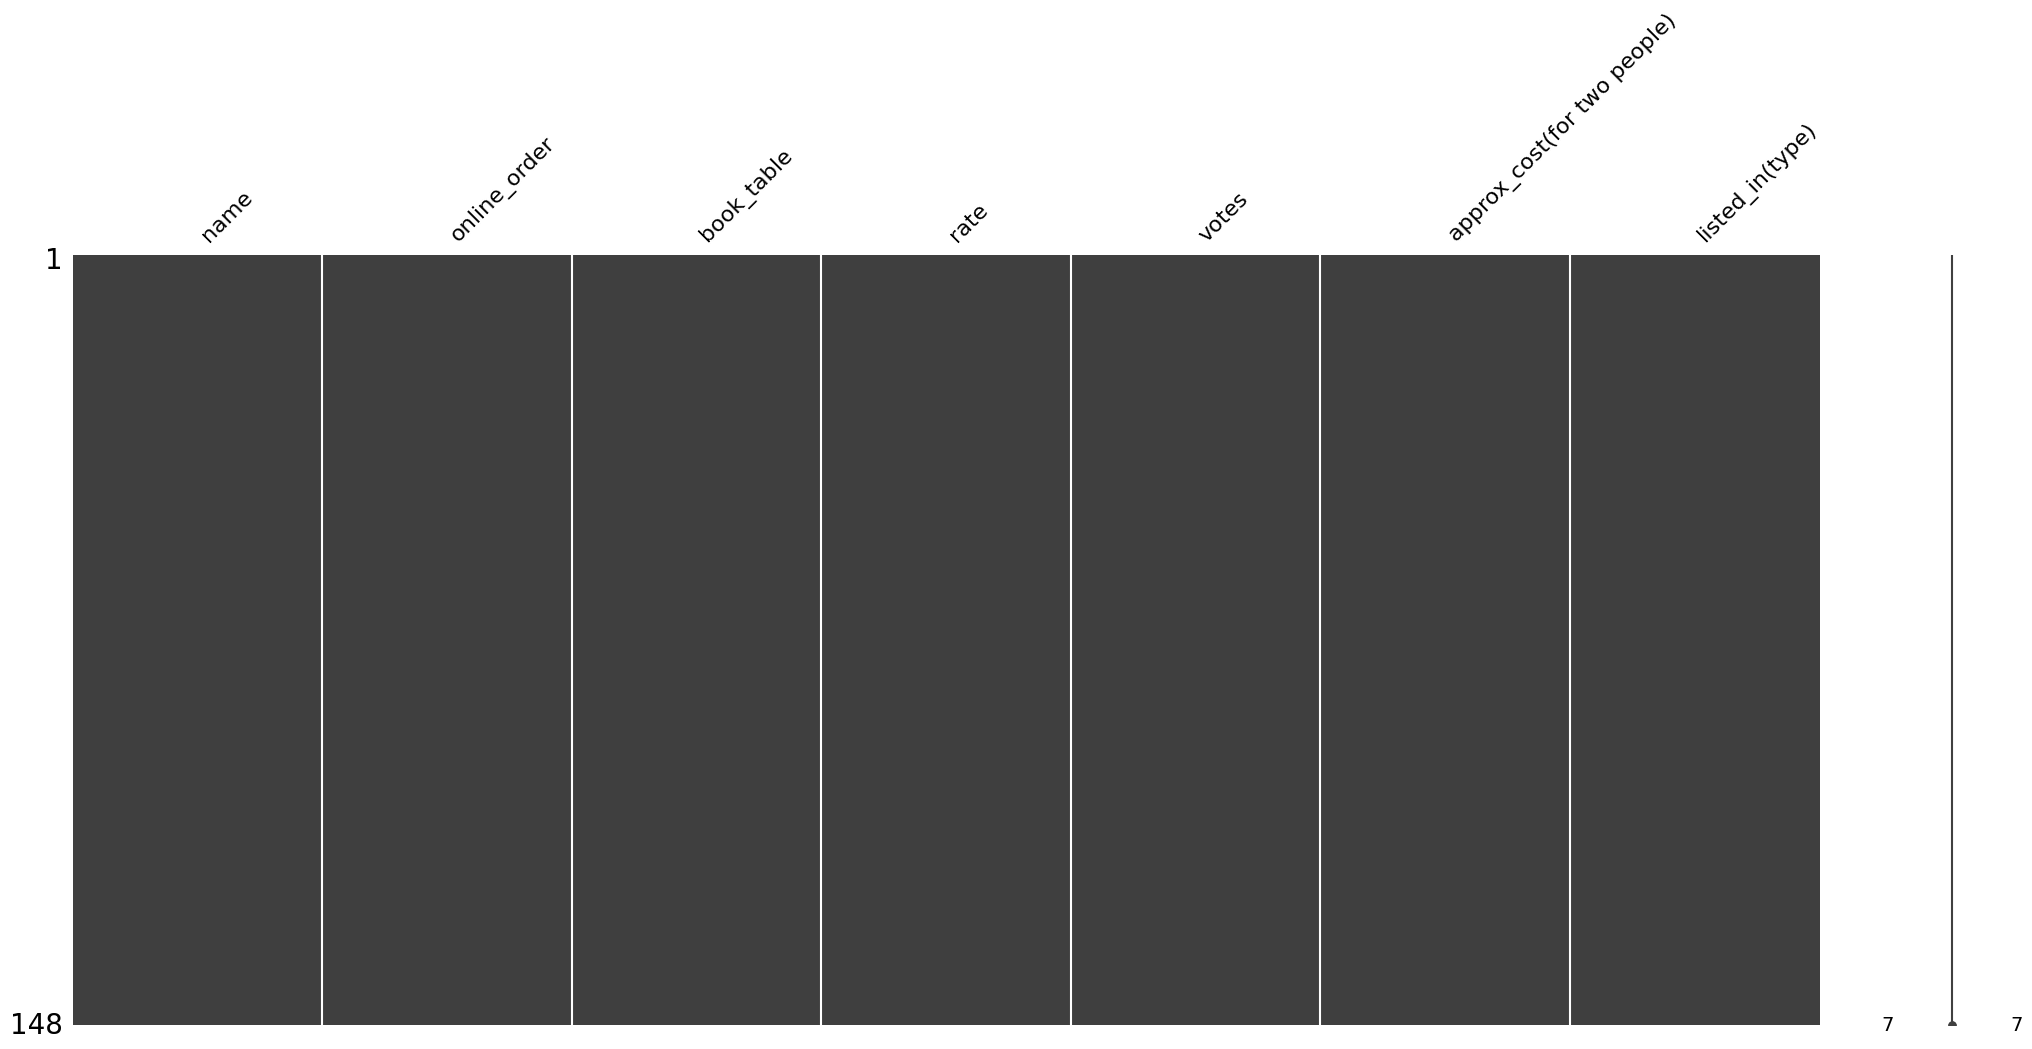

In [17]:
# are our data contain null value? 
msno.matrix(df)

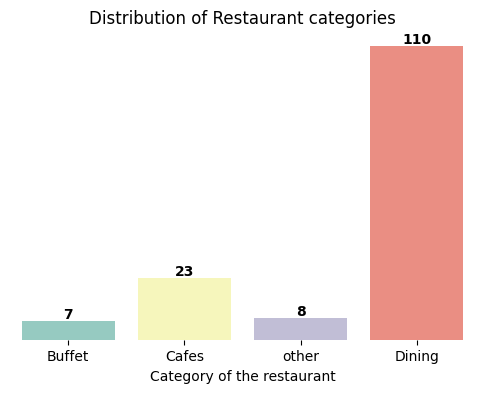

In [43]:
# good our data contain no null value

# let's explore the listed_in column

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['listed_in(type)'], palette='Set3')
ax.set_frame_on(False)  # Hide the box/frame
ax.get_yaxis().set_visible(False)  # Hide y-axis

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')
plt.xlabel("Category of the restaurant")
plt.title("Distribution of Restaurant categories")
plt.show()

<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">The majority of the restaurants fall into the dining category</div>

<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">now, we want to know what is the category that got a lot of votes</div>

In [50]:
# first we need to group the data 
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
grouped_data = pd.DataFrame({'votes':grouped_data}) 
grouped_data.head()

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


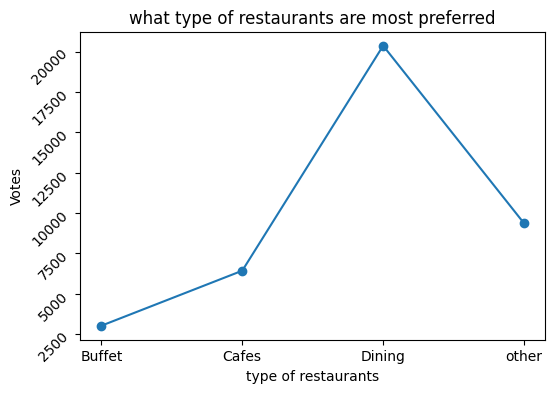

In [57]:
plt.figure(figsize=(6, 4))

plt.plot(grouped_data, marker='o')
plt.yticks(rotation=45)
plt.title("what type of restaurants are most preferred")
plt.xlabel('type of restaurants')
plt.ylabel('Votes')
plt.show()


<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">Dining restaurants are preferred by a larger number of individuals

Now we will determine the restaurant’s name that received the maximum votes
</div>

In [58]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [76]:
max_vote = df['votes'].max()
rest_max_vote = df.loc[df['votes'] == max_vote]['name'].iloc[0]
print(f"the winner is ===> {rest_max_vote} with a maximum vote of : {max_vote}")

the winner is ===> Empire Restaurant with a maximum vote of : 4884



<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">let's explore the online_order column
</div>

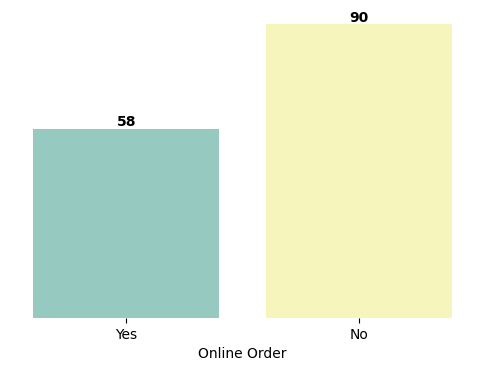

In [77]:
# good our data contain no null value

# let's explore the listed_in column

plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['online_order'], palette='Set3')
ax.set_frame_on(False)  # Hide the box/frame
ax.get_yaxis().set_visible(False)  # Hide y-axis

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')
plt.xlabel("Online Order")
plt.show()


<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">This suggests that a majority of the restaurants do not accept online orders.

Now we will examine whether online orders receive higher ratings than offline orders.
</div>

In [78]:
group_data = df.groupby('online_order')['rate'].mean()
group_data = pd.DataFrame({'rate':group_data})
group_data.head()

,rate
online_order,
No,3.487778
Yes,3.858621


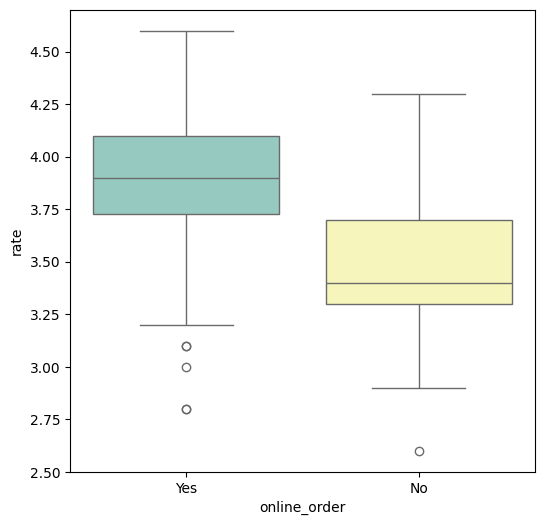

In [110]:
# or we can use box plot 
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df,palette='Set3')
plt.show()


<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

What about the Rate column
</div>

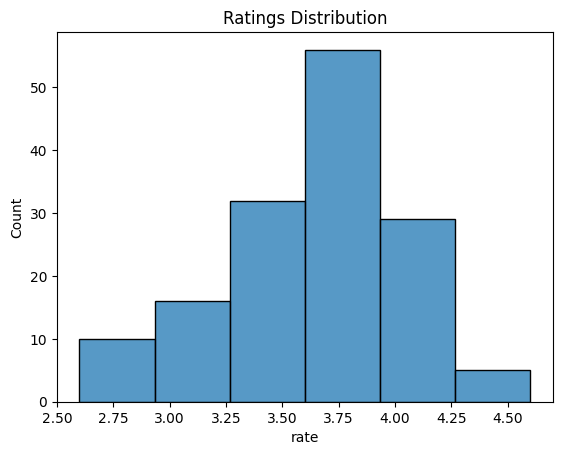

In [97]:
sns.histplot(df['rate'],bins=6)
plt.title('Ratings Distribution')
plt.show()



<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">Let’s explore the approx_cost(for two people) column.
</div>

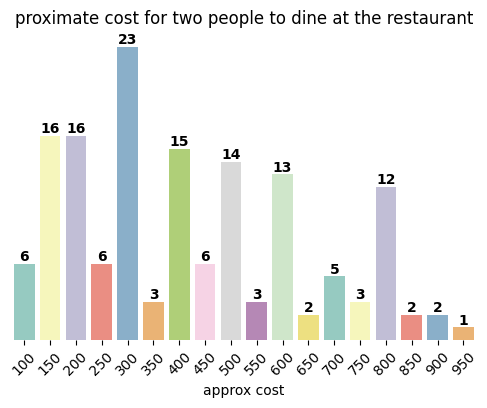

In [106]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['approx_cost(for two people)'], palette='Set3')
ax.set_frame_on(False) 
ax.get_yaxis().set_visible(False)  

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')
plt.xlabel("approx cost")
plt.title('proximate cost for two people to dine at the restaurant')
plt.xticks(rotation=45)
plt.show()



<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">The majority of couples prefer restaurants with an approximate cost of 300 rupees.
</div>



<div style="background-color:#212121; padding:15px; border-radius:7px;color:white;">
let's explore now the relationship between the type of restaurants and if they accept online order or not
</div>

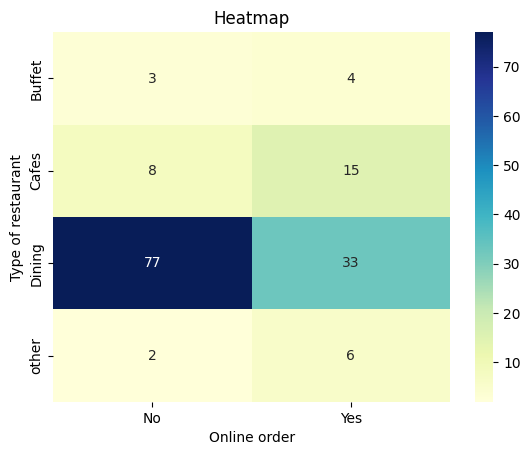

In [117]:
# first we need to create a pivot table 
pivot_table = df.pivot_table(index='listed_in(type)', columns=['online_order'],aggfunc='size',fill_value=0)

# let's display it in a nice format 
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online order')
plt.ylabel('Type of restaurant')
plt.show()

In [111]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
